In [1]:
from operator import *
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#Coupled equations for angular momentum using the Inertial Tensor
def t_handle_derivs(I,x):
    I1=I[0]
    I2=I[1]
    I3=I[2]
    w1=x[0]
    w2=x[1]
    w3=x[2]
    dw1 = ((I2-I3)/I1)*w2*w3
    dw2 = ((I3-I1)/I2)*w3*w1
    dw3 = ((I1-I2)/I3)*w1*w2
    return [dw1, dw2, dw3]

In [3]:
# standard forward euler
def forward_euler(f,x,dt,I):
    a = f(I,x)
    b = list(map(mul,a,[dt,dt,dt]))
    x_new = list(map(add, x,b))
    return x_new

In [4]:
# plot angular velocities of each axis
def plot_results(w1,w2,w3,T):
    plt.plot(T,w1)
    plt.plot(T,w2)
    plt.plot(T,w3)
    plt.show()

In [5]:
# save angular velocity data to a csv file.
def save_csv(filename, w1, w2, w3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(w1)):
        wtr.writerow([w1[i],w2[i],w3[i]])
    outfile.close()


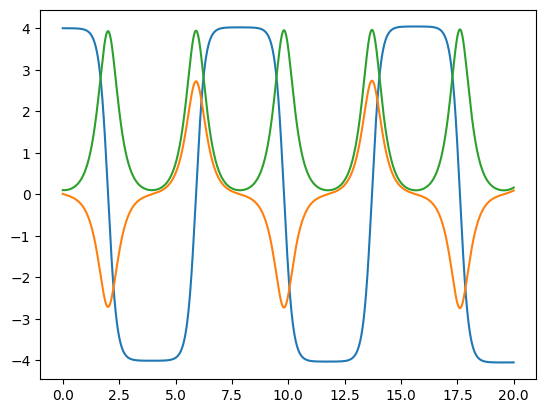

In [6]:
# initial conditions
I = [0.299, 0.408, 0.116]  # Inertia Tensor for rigid body
x = [4,0.01, 0.1]               # initial angular velocity of principle axes
t = 0.001                        # simulation timestep
end = 20                         # simulation end time

# set up simulation outputs
w1_out = []
w2_out = []
w3_out = []
T = np.arange(0,end,t)

#run simulation
for i in T:
    x = forward_euler(t_handle_derivs, x, t, I)
    w1_out.append(x[0])
    w2_out.append(x[1])
    w3_out.append(x[2])

# plot results
plot_results(w1_out,w2_out,w3_out,T)


In [7]:
# save results to an output file
save_csv("t_handle_angular_vel.csv",w1_out,w2_out,w3_out)


In [8]:
q0_out = []
q1_out = []
q2_out = []
q3_out = []


# calculate the quaternion rotation from angular velocity
def quaternion_product(quat ,omega):
    w1 = omega[0]
    w2 = omega[1]
    w3 = omega[2]
    
    q1 = quat[0]
    q2 = quat[1]
    q3 = quat[2]
    q4 = quat[3]
    
    dq1 = -w1*q2 -w2*q3 - w3*q4
    dq2 = w1*q1 + w3*q3 - w2*q4
    dq3 = w2*q1 - w3*q2 + w1*q4
    dq4 = w3*q1 +w2*q2 - w1*q3
    
    return [dq1/2, dq2/2, dq3/2, dq4/2]

q = [1,0,0,0] # all zero is an invalid rotation

for i in range(len(w1_out)):
#for i in range(20):
    omega = [w1_out[i],w2_out[i],w3_out[i]]
    qdot = quaternion_product(q,omega)
    #q_new = [q[0]+qdot[0]*t, q[1]+qdot[1]*t,q[2]+qdot[2]*t,q[3]+qdot[3]*t] #update quaternion
    q_new = np.add(q,np.multiply(qdot,t)) # update quaternion
    q = q_new
    
    q0_out.append(q[0])
    q1_out.append(q[1])
    q2_out.append(q[2])
    q3_out.append(q[3])

In [9]:
def plot_quaternions(T, q0, q1, q2, q3):
    plt.plot(T,q0)
    plt.plot(T,q1)
    plt.plot(T,q2)
    plt.plot(T,q3)
    plt.legend(["q0","q1","q2","q3"])
    plt.show()

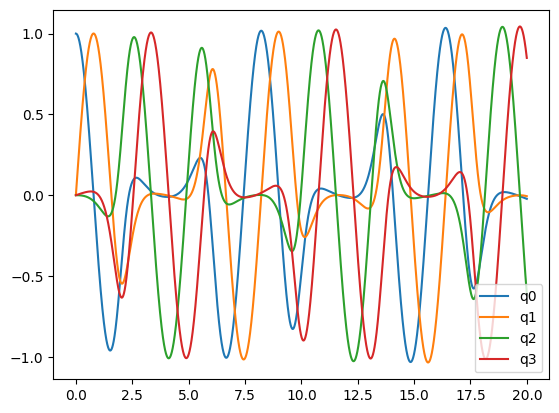

In [10]:
plot_quaternions(T, q0_out, q1_out, q2_out, q3_out)

In [11]:
# save quaternion data to a csv file.
def save_quat_csv(filename, q0, q1, q2, q3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(q0)):
        wtr.writerow([q0[i],q1[i],q2[i],q3[i]])
    outfile.close()

In [12]:
save_quat_csv("T-handle_quat.csv",q0_out,q1_out,q2_out,q3_out)